# Parabilic SAR AF パラメータのスクリーニング・チェック (3) 集計

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import os
import re

import numpy as np
import pandas as pd
from matplotlib import (
    font_manager as fm,
    pyplot as plt,
)
from funcs.common import add_data_af

In [3]:
name_doe = 'Simple_SAR_3'
name_doe_2 = 'study_203_AF'
dir_path = '../doe/results_%s' % name_doe
list_date = sorted(
    [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]
)
print(list_date)

['2025-03-19', '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-31', '2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-14', '2025-04-15', '2025-04-16', '2025-04-17', '2025-04-18', '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24', '2025-04-25', '2025-04-28']


In [4]:
pattern = re.compile(r'summary.*_([0-9a-z]{4}).*\.html')
df_7011 = pd.DataFrame()
df_7203 = pd.DataFrame()
df_8306 = pd.DataFrame()

dict_html = dict()

for date in list_date:
    for f in sorted(os.listdir(os.path.join(dir_path, date))):
        m = pattern.match(f)
        if m:
            code = m.group(1)
            dict_html[code] = f
    for code in dict_html.keys():
        tbl = pd.read_html(os.path.join(dir_path, date, dict_html[code]))
        if code == '7011':
            add_data_af(df_7011, tbl[0], date)
        elif code == '7203':
            add_data_af(df_7203, tbl[0], date)
        elif code == '8306':
            add_data_af(df_8306, tbl[0], date)
        else:
            pass

#print(df_7011)
#print(df_7203)
#print(df_8306)

In [5]:
df_7011[df_7011.columns[len(df_7011.columns) - 1]]

0     -800
1    -2200
2    -1800
3    -1200
4    -1600
5      800
6    -1300
7    -1600
8    -2400
9    -1500
10   -3600
11   -1800
12   -1000
13   -1400
14   -1500
15   -3000
16   -2500
17   -3700
18   -4800
19   -6600
Name: 2025-04-28, dtype: int64

In [6]:
df_sum = pd.DataFrame()
df_sum['af_init'] = df_7011['af_init']
df_sum['af_step'] = df_7011['af_step']
df_sum['af_max'] = df_7011['af_max']
df_sum

,af_init,af_step,af_max
0,0.0,0.00001,0.0010
1,0.0,0.00002,0.0020
2,0.0,0.00003,0.0030
3,0.0,0.00005,0.0050
4,0.0,0.00007,0.0075
5,0.0,0.00010,0.0100
6,0.0,0.00020,0.0200
7,0.0,0.00030,0.0300
8,0.0,0.00050,0.0500
9,0.0,0.00075,0.0750


In [7]:
df_sum['7011'] = df_7011.sum(axis=1)
df_sum['7203'] = df_7203.sum(axis=1)
df_sum['8306'] = df_8306.sum(axis=1)
df_sum

,af_init,af_step,af_max,7011,7203,8306
0,0.0,0.00001,0.0010,-3899.99899,36400.00101,50250.00101
1,0.0,0.00002,0.0020,3300.00202,50600.00202,30750.00202
2,0.0,0.00003,0.0030,38900.00303,7400.00303,37450.00303
3,0.0,0.00005,0.0050,26600.00505,12300.00505,40050.00505
4,0.0,0.00007,0.0075,8300.00757,5800.00757,17650.00757
5,0.0,0.00010,0.0100,10800.01010,14800.01010,33950.01010
6,0.0,0.00020,0.0200,-18799.97980,-9999.97980,10850.02020
7,0.0,0.00030,0.0300,5200.03030,-15599.96970,1850.03030
8,0.0,0.00050,0.0500,-28599.94950,3700.05050,22650.05050
9,0.0,0.00075,0.0750,-39599.92425,21500.07575,40450.07575


## AF step vs. Profit (median)

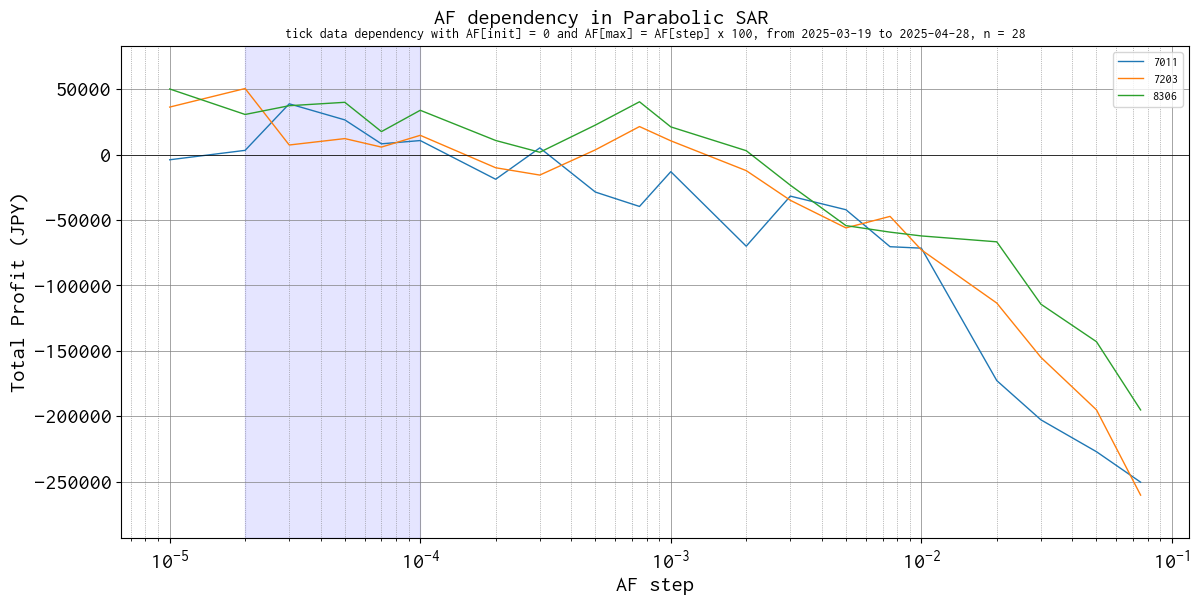

In [8]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

x = df_sum['af_step']
y = dict()
for i, code in enumerate(['7011', '7203', '8306']):
    y[i] = df_sum[code]
    ax.plot(x, y[i], label='%s' % code, lw=1)


threshold = 0
ax.fill_between(
    x, 0, 1,
    where=(y[0] > threshold) & (y[1] > threshold) & (y[2] > threshold),
    color='blue',
    alpha=0.1,
    transform=ax.get_xaxis_transform()
)

ax.axhline(0, color='black', lw=0.5)
ax.set_xscale('log')
ax.grid(which='major', color='gray',linestyle='-', linewidth=0.5)
ax.grid(which='minor', color='gray',linestyle='dotted', linewidth=0.5)

ax.set_xlabel('AF step')
ax.set_ylabel('Total Profit (JPY)')
ax.legend(fontsize=9)

ax.set_title(
    'tick data dependency with AF[init] = 0 and AF[max] = AF[step] x 100, from %s to %s, n = %d' % (
        list_date[0], list_date[len(list_date) - 1], len(list_date)
    ),
    fontsize=10
)

plt.suptitle('AF dependency in Parabolic SAR', fontsize=16)
plt.subplots_adjust(left=0.1, right=0.99, bottom=0.1, top=0.92)
plt.savefig('./%s/total.png' % name_doe_2)
plt.show()